In [48]:
import pandas as pd 
#import pandas_datareader as pdr  
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb 
import math
sb.set()


In [49]:
ticker = "^SPX"
return_type = 'Adj Close'

In [50]:
raw_data = yf.download(ticker, start="1950-01-03" , end="2012-11-15")
data = raw_data.pct_change()[1:].filter([return_type]) # calculated daily return
# raw_data['Price_Difference'] = raw_data['Close'] - raw_data['Open'] # calculated daily return
# data = raw_data[['Price_Difference']]
# We will use the column for Adjusted Close as the column to base our calculations upon
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

            Adj Close
Date                 
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852


In [51]:
data_length = len(data)
print(data_length)

15819


In [58]:
regions_to_analyze = []

for i in range(0, 6):
    num_of_subarrays = 2**i
    min_size = data_length // num_of_subarrays
    remainder = data_length % num_of_subarrays
    
    current_region = []
    start_index = 0
    # Distribute the remainder by adding an extra element to some subarrays
    for i in range(num_of_subarrays):
        size = min_size + (1 if i < remainder else 0)
        current_region.append( data.iloc[start_index:start_index+size])
        start_index += size
    
    regions_to_analyze.append(current_region)
        
for region in regions_to_analyze:
    print(len(region))
    print(region)

1
[            Adj Close
Date                 
1950-01-04   0.011405
1950-01-05   0.004748
1950-01-06   0.002953
1950-01-09   0.005889
1950-01-10  -0.002927
...               ...
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852

[15819 rows x 1 columns]]
2
[            Adj Close
Date                 
1950-01-04   0.011405
1950-01-05   0.004748
1950-01-06   0.002953
1950-01-09   0.005889
1950-01-10  -0.002927
...               ...
1981-07-06  -0.009872
1981-07-07   0.006831
1981-07-08   0.000624
1981-07-09   0.007637
1981-07-10   0.000541

[7910 rows x 1 columns],             Adj Close
Date                 
1981-07-13   0.002087
1981-07-14   0.000077
1981-07-15   0.004474
1981-07-16   0.000845
1981-07-17   0.003222
...               ...
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852

[7909 rows x 1 columns]]
4
[            Adj Close
Date                 
1950-01-04

In [59]:
# Rescale range calculations

calculated_r = []
x_axis = [] # log of size
y_axis = [] # log of rescaled range, averaged


for sub_list in regions_to_analyze:
  #print("Num of sub arrays: " , len(sub_list))
  cum_r = 0.0
  size = 0
  tmp = []
  i = 0
  number_of_ranges_in_region = len(sub_list)
  for df in sub_list:
    df= df[1:]
    # print(df)
    size = len(df) # number of data points, size of data
    
    #print("size: ", size)
    if i == 0:
      x_axis.append(math.log10(size)) # append the log size
    mean_df = df.mean() # the mean of the data
    std_df = df.std()[return_type] # the standard deviation of the data
    result_df = df - mean_df # new dataframe that stores elemental deviations
    r_t = float(result_df.max() - result_df.min()) # range of deviations
    # print("std :", std_df['Adj Close'])
    rescaled_range = r_t / std_df
    #print("re range: " , rescaled_range)
    cum_r += rescaled_range # this accumulates the rescaled range for an average
    print(f'Ranges in region: {number_of_ranges_in_region} \t Rescaled range: {rescaled_range}')
    if np.isnan(rescaled_range) == False: # get rid of NaN values
      tmp.append(rescaled_range)
    i+=1
  #print("cum", cum_r)
  calculated_r.append(tmp)

print("x axis",x_axis)
print(calculated_r)

# find the rescaled range average of each sublist
for l in calculated_r:
  #print(l)
  avg = sum(l) / len(l) # find the average for each subarray
  y_axis.append(math.log10(avg)) #append log of rescaled range
  
print("y axis: ", y_axis)


Ranges in region: 1 	 Rescaled range: 32.83386778885849
Ranges in region: 2 	 Rescaled range: 15.432203444189716
Ranges in region: 2 	 Rescaled range: 27.77846275916889
Ranges in region: 4 	 Rescaled range: 16.188724170909897
Ranges in region: 4 	 Rescaled range: 10.704487357008407
Ranges in region: 4 	 Rescaled range: 31.231351802254203
Ranges in region: 4 	 Rescaled range: 15.512822092436414
Ranges in region: 8 	 Rescaled range: 14.862899546238914
Ranges in region: 8 	 Rescaled range: 17.48346816403873
Ranges in region: 8 	 Rescaled range: 11.372985118692869
Ranges in region: 8 	 Rescaled range: 8.96617293389168
Ranges in region: 8 	 Rescaled range: 26.492320214410313
Ranges in region: 8 	 Rescaled range: 13.303988059485953
Ranges in region: 8 	 Rescaled range: 10.081672262166851
Ranges in region: 8 	 Rescaled range: 14.679989946894576
Ranges in region: 16 	 Rescaled range: 11.531588418747864
Ranges in region: 16 	 Rescaled range: 14.014289353203255
Ranges in region: 16 	 Rescaled ra

/var/folders/_6/v82492vs3v15ky01z3_bl5kr0000gn/T/ipykernel_69522/2241485107.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_t = float(result_df.max() - result_df.min()) # range of deviations


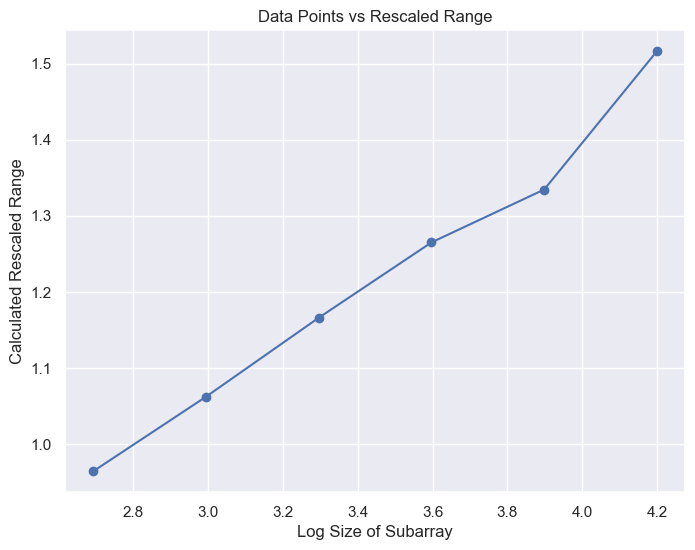

In [60]:
# Plot the line graph with dots for each data point
plt.plot(x_axis, y_axis, marker='o', linestyle='-')


# Add labels and title
plt.xlabel('Log Size of Subarray')
plt.ylabel('Calculated Rescaled Range')
plt.title('Data Points vs Rescaled Range')

# Show the plot
plt.show()

In [61]:
# Calculate H, which is the slope of the graph above

m, c = np.polyfit(x_axis, y_axis, 1)
print("Hearst coefficient is: ")
print(m)

Hearst coefficient is: 
0.34889826647660516
